# PRCP-1025-FLIGHT PRICE PREDICTION

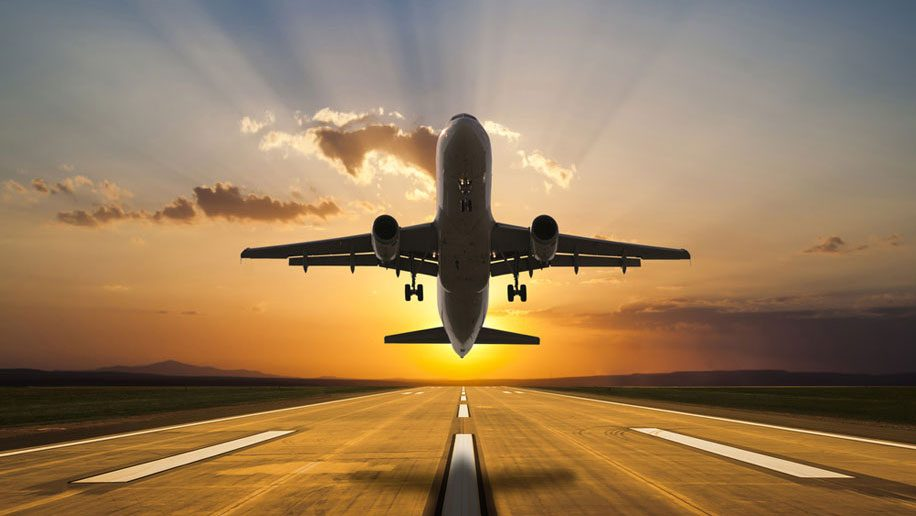

### Introduction: The objective of the study is to analyse the flight price prediction dataset obtained in order to get meaningful information from it. The regression i.e supervised learning algorithm would be used to train the dataset and predict a continuous target variable. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

# Features:
###### 1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
###### 2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
###### 3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
###### 4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
###### 5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
###### 6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
###### 7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
###### 8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
###### 9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.


###### 10) Price: Target variable stores information of the ticket price.

### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
df = pd.read_excel('Flight_Fare.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Basic checks of data

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### Information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Statistical Analysis of the data

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## EDA (Exploratory Data Analysis)

### Univariate Analysis

In [7]:
import sweetviz as sv 
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights from univariate analysis

###### 1. Majority i.e 36% of the people preferred Jet Airways,19% Indigo,16% Air India,11% multiple carriers,8% Spice Jet and the least i.e 4% Vistara.

###### 2.Most of the flights have the source from Delhi- 42% , Kolkata- 27% ,Bangalore- 21%,Mumbai -7% and the least source is Chennai-4%

###### 3.Highest destinations were to Cochin-42%, Bangalore- 27% , Delhi-12%, New Delhi- 9%, Hyderabad- 7% and the least destination flights were to Kolkata - 4%

###### 4.Majority of the flight routes were from Delhi to Cochin, halting at Mumbai- 22%, Bangalore to Delhi were direct flights- 15% and remaining 9% and 7% were from Kolkata to Bangalore halting at Mumbai and from Kolkata to Bangalore direct flights and the remaining 32% were others

###### 5. Many passengers have choosen flights which are having single or no stops for fast travel i.e 53% and 33%. Remaining flights which would be halted at 2 stops are 14% and the flights which would be halted for 3 to 4 stops are less than 1 %.

###### 6. Majority of the additional information is not given much which is having the highest percentage i.e 78% , In-flight meal not included is 19% ,No check-in baggage included is 3% and one long layover information, changing of airports, business class all have the additional information of less than 1%

###### 7. The date of journey has maximum of 20% of people, on 6th of the month, , 13% of the people on 5th of the month,11% people on 27th of the month and remaining 6% on 4th of the month7. 2.4% of the price of the flight ranges from Rs10,262 to Rs 10,844, 1.5% to 1.2% ranges from Rs 7229 to Rs 4823, 1.0% to 0.9% ranges to Rs 3943 and Rs 15129, 0.8% to 0.7% ranges from Rs 9663, Rs 14781 and Rs 12373.

###### 8. 24% of the passengers preferred travelling in June month, 21% in March, 19% in May, 13% in Septmber,10% in January, 9% in December and 4% in April

###### 9. 8.6% of the passengers departed at 9:00 am, 8.1% at 7 am, 6.5% at 8 am, 6.5% at 5pm,6.5% at 6am, 6.1% at 8pm, and remaining 5.9% to 3.9% passengers departed at 5am, 11am, 7pm, 10 am 6pm and so on

###### 10. 15.2 % passengers arrived at 7pm, 7.8% at 4 am, 6.6% at 9 pm, 5% at 1 am,4.8% at 6pm and the remaining 4.6% to 3% passengers arrived at 9a, 11pm, 8pm and 12 am respectively.

###### 11. 22.5% passengers had flight duration of 2 hours,5.8% had 1 hour, 4.7% had 3 hours, 4% had 12 hours and remaining 3.8% to 2.5% had their duration of 13 hours, 10 hours, 14, 15 and 23 hours respectively.

### Bivariate Analysis

In [8]:
data1 = df[['Airline','Source','Destination','Total_Stops']]

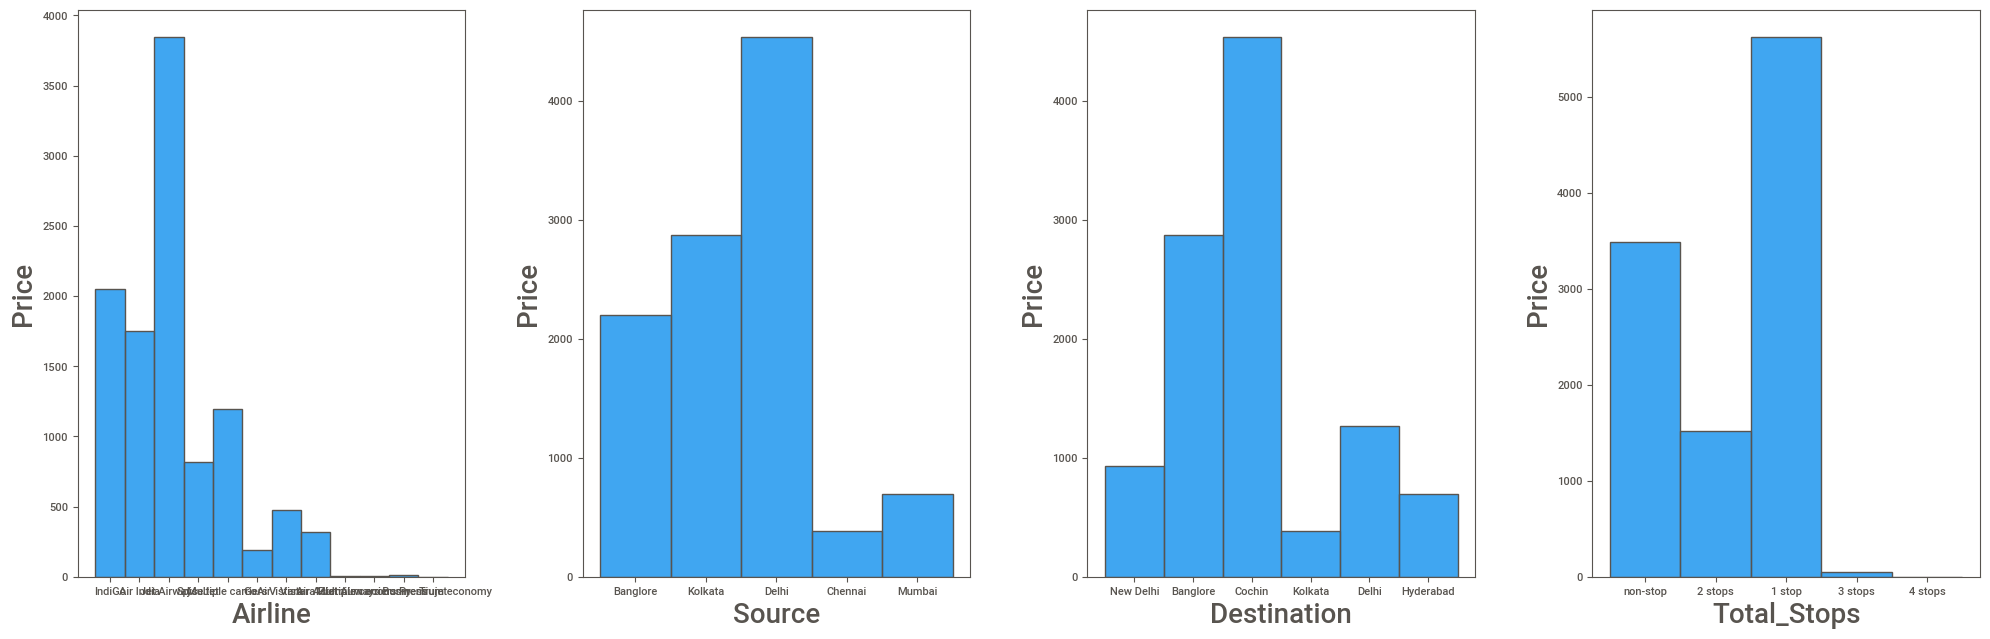

In [9]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data1[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

### Conclusions: 
### graph 1: Jet Airways is having the highest ticket rate.
### graph 2: Flights having the highest price have the source point as  Delhi than Kolkata, later Bangalore and the least point of source is Chennai terminal which is also having the least price.
### graph 3: Flights having the highest point of destination and having the highest price is Cochin than Bangalore, later Delhi and the minimal destination is Kolkata, having the lower price.
### graph 4: Flights having less number of stops has higher price and vice-versa, i.e The single stop flight has higher price,non-stop flight has second highest price and the minimal price has 4 stops.


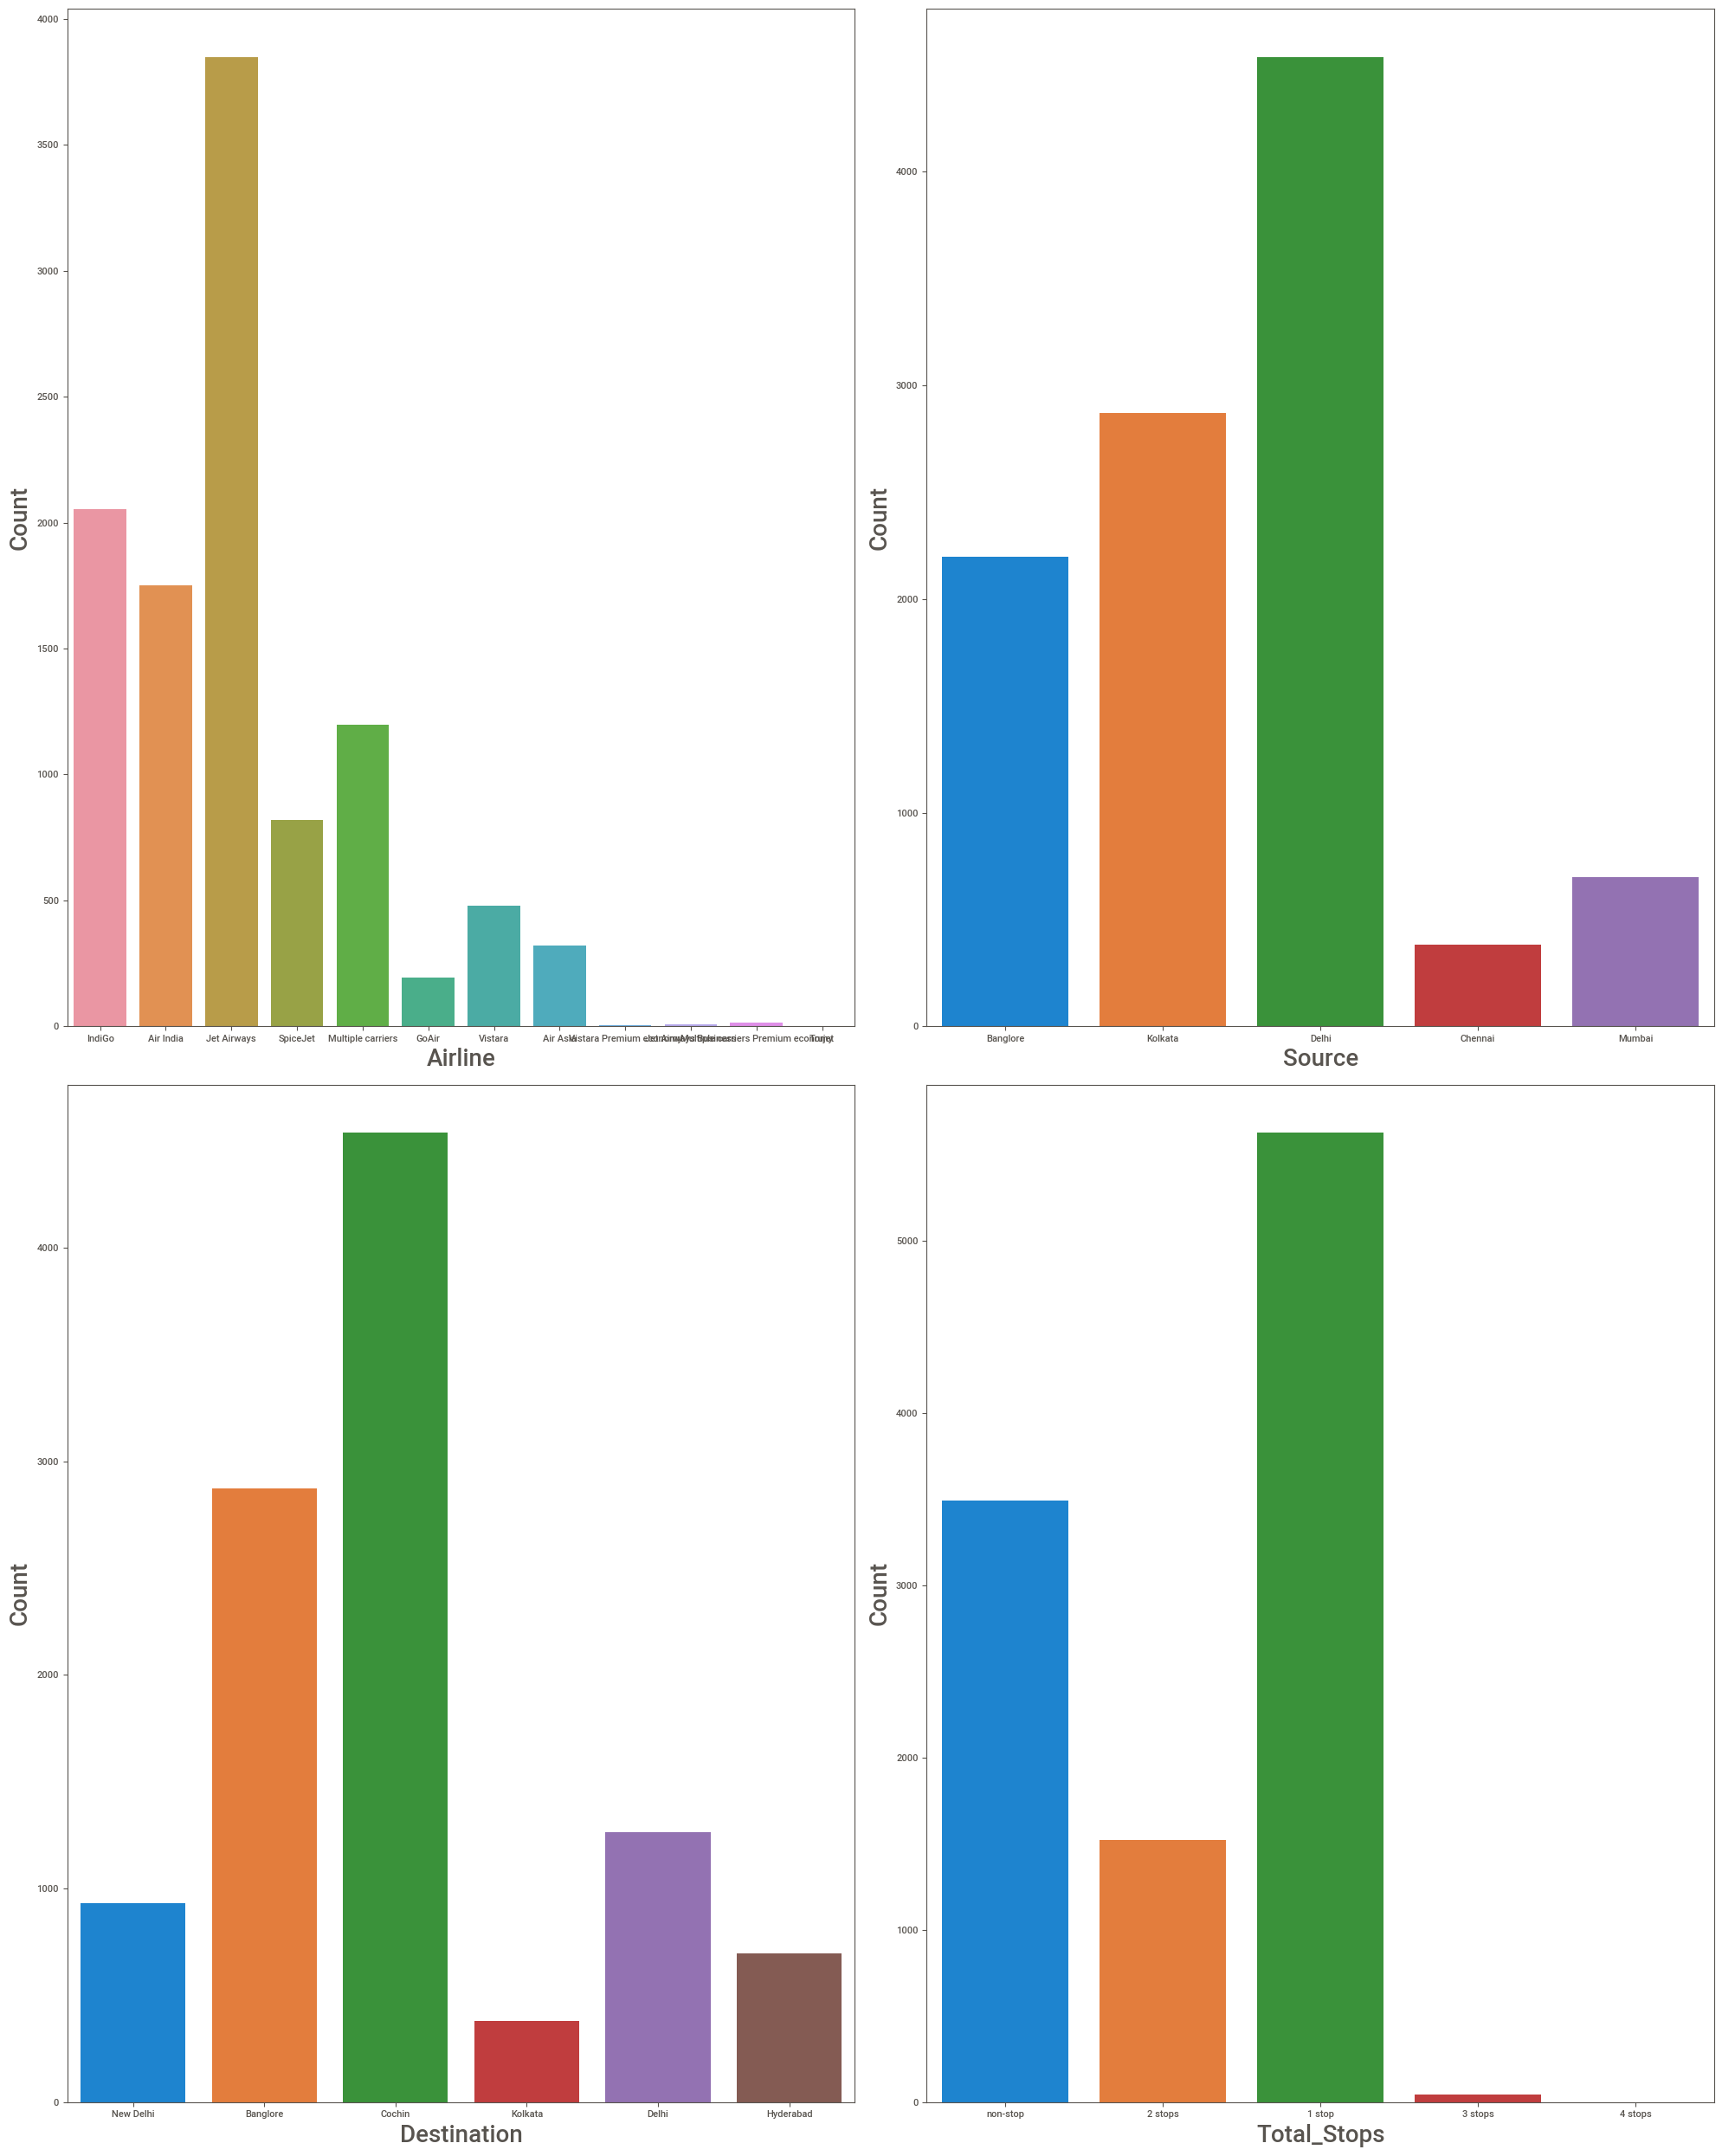

In [12]:
# Chwcking the Count of Unique values in the given Features 
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(x=data1[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Count',fontsize = 20)
    plotnumber+=1#counter increment
plt.tight_layout()

### Conclusions:
### Graph 1: Jet Airways are highest in number, compared to Indigo and other flights.
### Graph 2: Delhi is having the highest source point compared to Kolkata , Bangalore, Mumbai and the least source point is Chennai terminal
### Graph 3: Cochin is having the highest point of Destination than Bangalore, Delhi etc and the least destination point is Kolkata.
### Graph 4: Passengers have  choosen flights that are having single stop than non-stop, 2 stops and 3 stops. The least number of flights are those having 4 stops.

### checking the relationship of all variables with respect to target variables

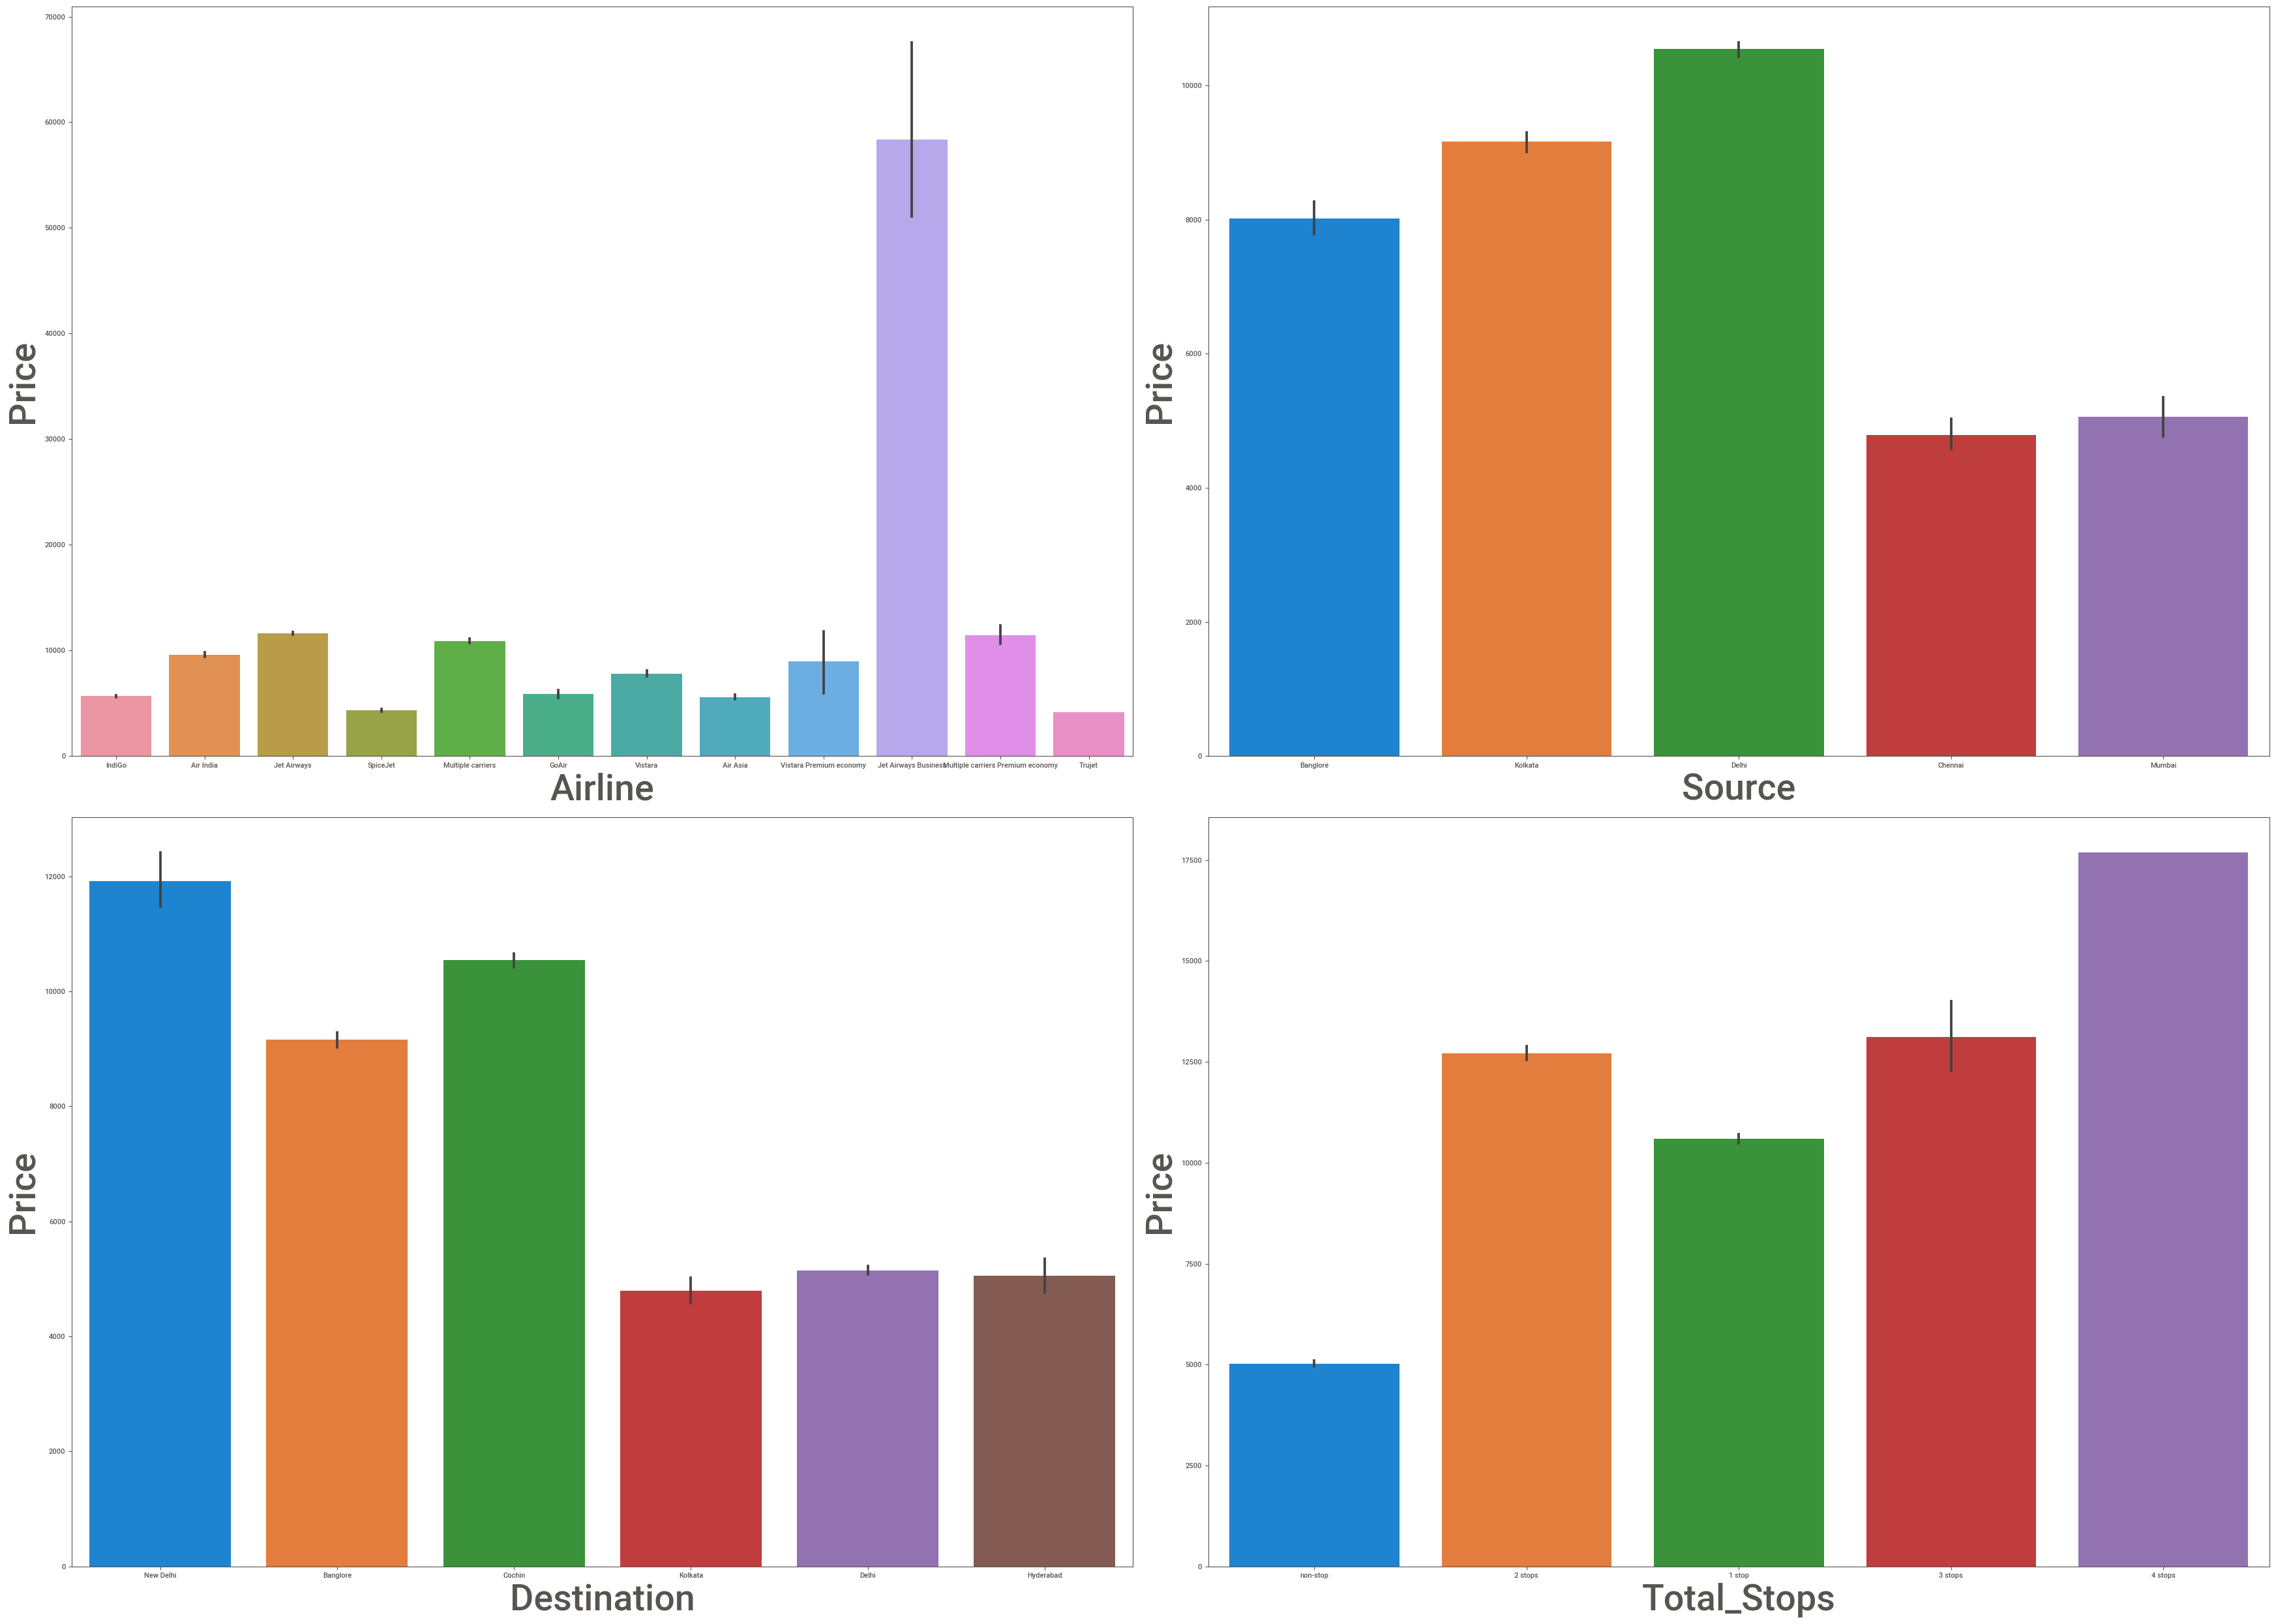

In [11]:
plt.figure(figsize=(35,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(2,2,plotnumber)
        sns.barplot(x=data1[column],y= df.Price)
        plt.xlabel(column,fontsize=40)#assign name to x-axis and set font-20
        plt.ylabel('Price',fontsize=40)
    plotnumber+=1#counter increment
plt.tight_layout()

### Conclusions:
### Graph 1: Jet Airways are highest in number, compared to Indigo and other flights.
### Graph 2: Delhi is having the highest source point compared to Kolkata , Bangalore, Mumbai and the least source point is Chennai terminal
### Graph 3: Cochin is having the highest point of Destination than Bangalore, Delhi etc and the least destination point is Kolkata.
### Graph 4: Passengers have choosen flights that are having single stop than non-stop, 2 stops and 3 stops. The least number of flights are those having 4 stops.

### Relational plot between Total_stops and Price

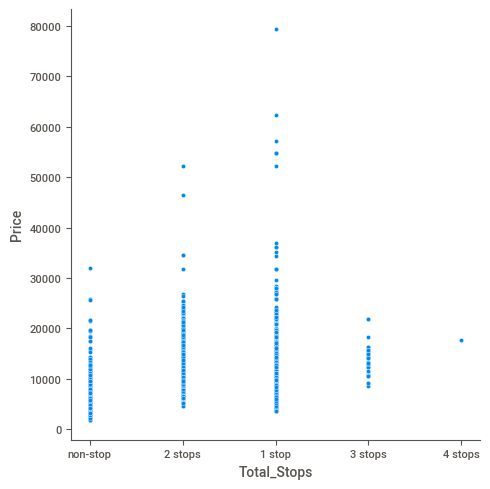

In [12]:
sns.relplot(x='Total_Stops',y='Price',data=df)

###### The flights which are having single stop has higher price and the flights having 3 to 4 stops are having lowest price

### Relational plot between Source and Price w.r.t Total_Stops

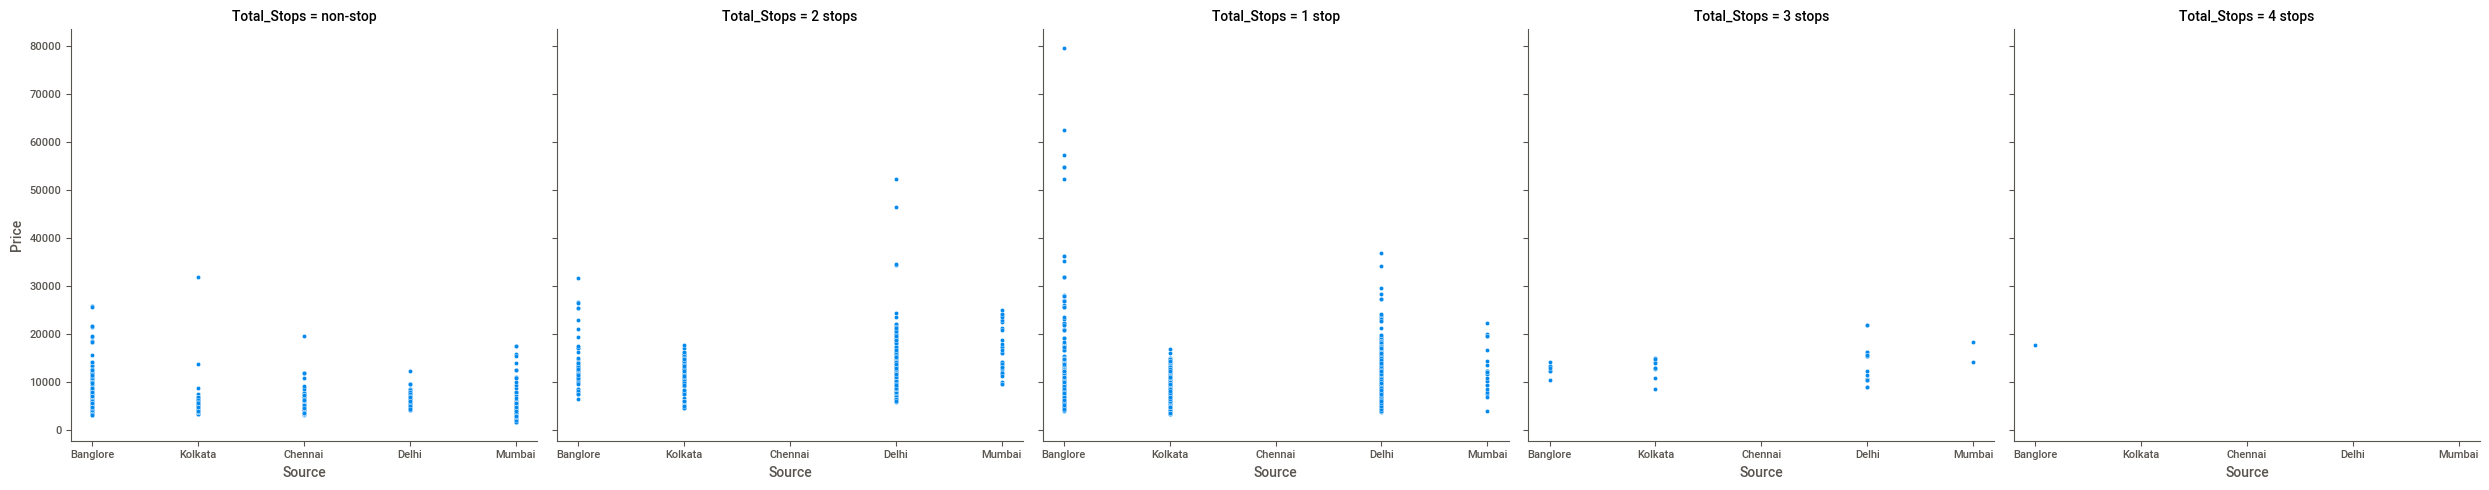

In [13]:
sns.relplot(x='Source',y='Price',col='Total_Stops',data=df)

### graph 1: Non stop flights are having source mainly from Kolkata and Bnagalore and with the highest prices
### graph2:Flights having 2 stops as halt, majority are from Delhi and Bangalore with higher prices and flight having their source as Chennai doesn't have 2 stops
### graph 3: Flights having 1 stop and source as bangalore are having higher price and the least is kolkata
### graph 4:Flights having 3 stops, have the higher price which has their source as Delhi
### graph 5:Flights having 4 stops, have the price which has only one source i.e Bangalore

<AxesSubplot:xlabel='Price', ylabel='Density'>

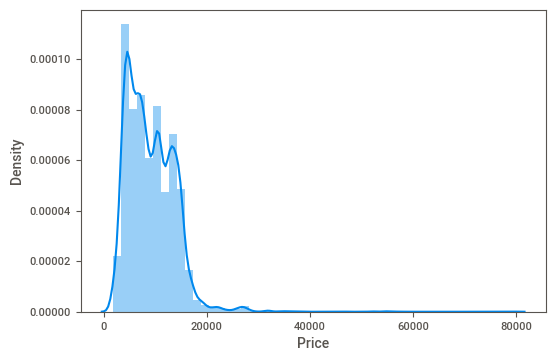

In [14]:
sns.distplot(df.Price)

# Pre Processing

### Finding null values

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

###### It's been observed that there are 2 missing values,since these are very less, we can drop them

In [11]:
df.dropna(inplace = True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

###### The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.¶
###### dt.day method will extract only day of that date
###### dt.month method will extract only month of that date

In [12]:
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [13]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [14]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

###### Now ,we extract day and month from Date_of_journey and stored in 2 other columns.
###### Then there will be no use of 'Date_of_Journey' column,so we drop it.

In [15]:
import datetime as dt
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [16]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-09-04 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-04 05:50:00,2022-09-04 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-04 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-09-04 18:05:00,2022-09-04 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-09-04 16:50:00,2022-09-04 21:35:00,4h 45m,1 stop,No info,13302,3,1


###### From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns

In [18]:
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [19]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-04 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-09-04 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-09-04 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


### As we did for Dep_Time, we are extracting hours and minutes from Arrival_Time

In [20]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


###### Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [21]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [22]:
df['Duration']=duration

In [23]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [24]:
df['dur_hour']=df['Duration'].apply(hour)
df['dur_min']=df['Duration'].apply(minutes)
drop_col(df,'Duration')## dropping Duration column as it has no use

In [25]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [26]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

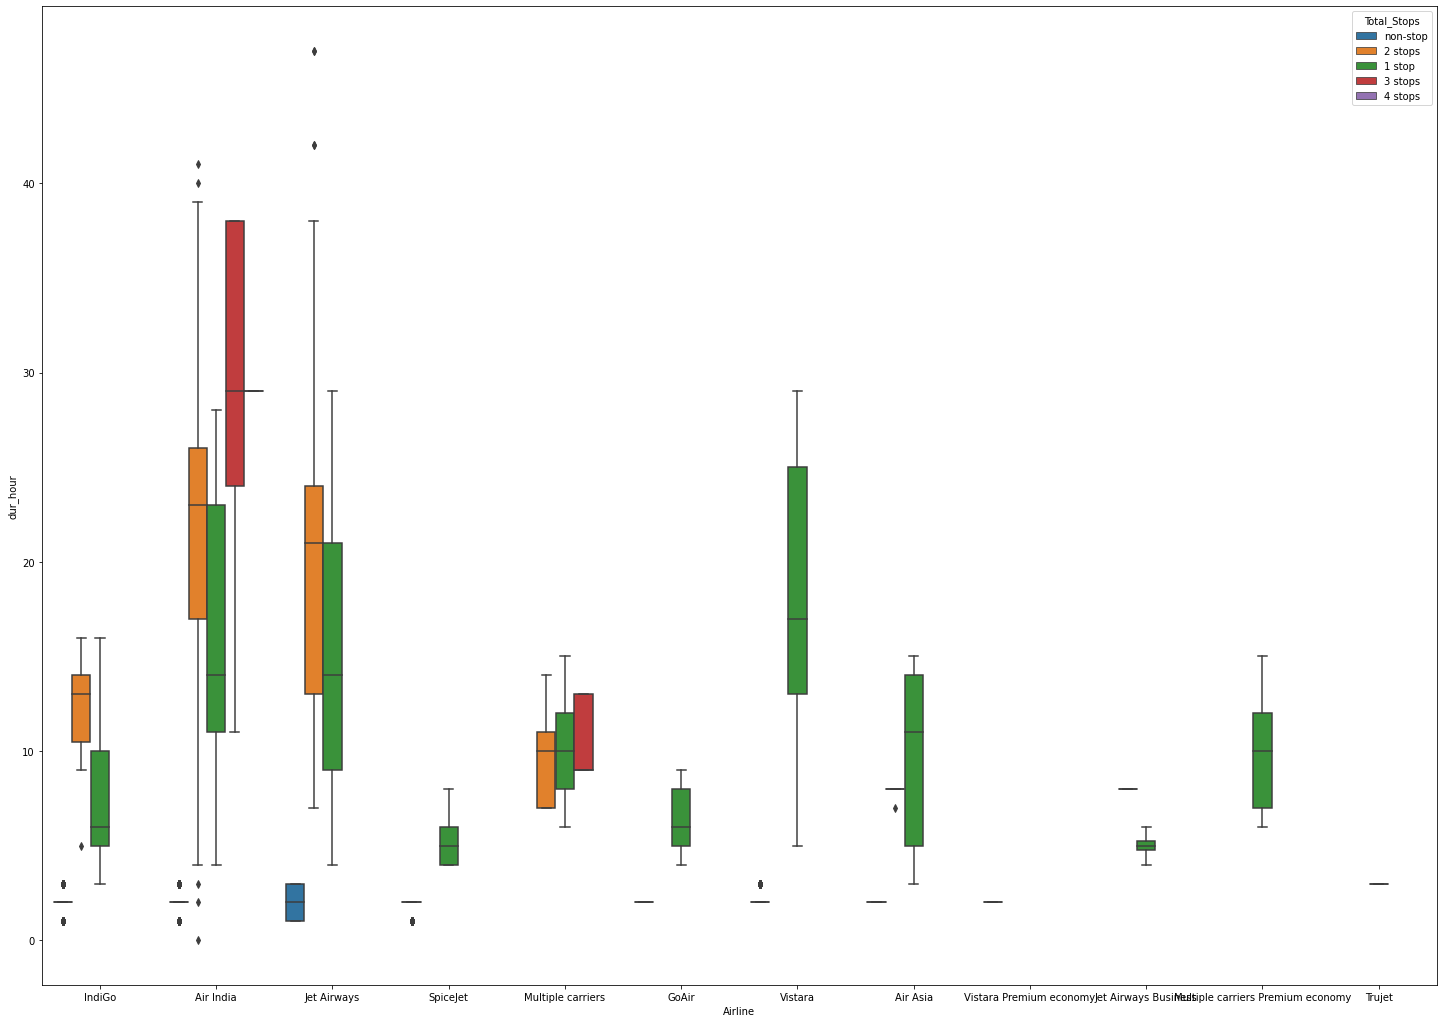

In [27]:
plt.figure(figsize = (25,18))
sns.boxplot(x = df.Airline, y = df.dur_hour, hue = df.Total_Stops)
plt.show()

### checking the outliers for dur_hour

<AxesSubplot:xlabel='dur_hour'>

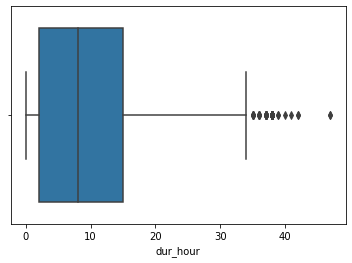

In [28]:
sns.boxplot(df.dur_hour)

### Removing the outliers by using IQR

In [29]:
from scipy import stats
IQR = stats.iqr(df.dur_hour, interpolation = 'midpoint')
IQR

13.0

In [30]:
# First quartile (Q1) 
Q1 = df.dur_hour.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.dur_hour.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR
print(min_limit)
print(max_limit)

-17.5
34.5


In [31]:
df.loc[df['dur_hour'] > max_limit]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
226,Jet Airways,Delhi,Cochin,DEL → IDR → BOM → COK,2 stops,No info,18799,3,3,5,25,18,50,37,25
553,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,10598,3,9,5,0,19,15,38,15
919,Air India,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,3 stops,No info,10991,5,12,12,0,23,15,35,15
925,Jet Airways,Delhi,Cochin,DEL → DED → BOM → COK,2 stops,No info,19907,3,6,16,50,4,25,35,35
966,Air India,Delhi,Cochin,DEL → NAG → BOM → COK,2 stops,No info,10493,21,5,5,55,19,15,37,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,2 stops,No info,17135,3,1,8,50,23,55,39,5
10020,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,9653,5,9,5,0,19,15,38,15
10326,Air India,Banglore,New Delhi,BLR → CCU → GAU → DEL,2 stops,No info,11791,3,3,5,50,22,10,40,20
10456,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,20694,3,6,19,10,18,50,47,40


In [32]:
import numpy as np
df.loc[df['dur_hour'] > max_limit,'dur_hour']=np.median(df.dur_hour)

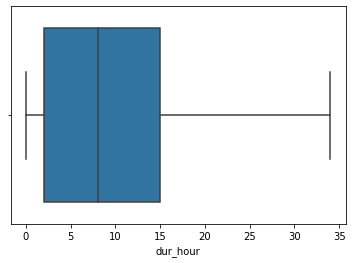

In [33]:
sns.boxplot(df.dur_hour)
plt.show()

### Outliers have been removed

In [34]:
df.describe()

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.041659,28.326624
std,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.182959,16.945817
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,34.000000,55.000000


######  Duration hour cant be  0 as we know that there is no flight which goes from Mumbai to Hyderabad in 5 min

In [35]:
df[df['dur_hour']== 0]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,3,6,16,50,16,55,0,5


In [36]:
dg = df[df['Total_Stops'] == '2 stops'] ## taking data which has total stops of 2 as mumbai to hyd we have only 2 stops

In [37]:
df['dur_hour'] = df['dur_hour'].replace(0, dg.dur_hour.mean())
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2.0,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7.0,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19.0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5.0,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4.0,45


In [38]:
df.describe()

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.043435,28.326624
std,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.182838,16.945817
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,34.000000,55.000000


<AxesSubplot:xlabel='dur_hour'>

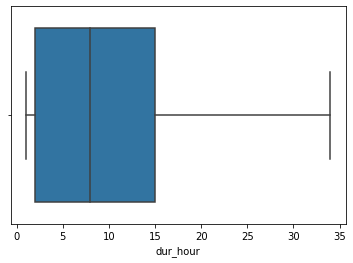

In [39]:
sns.boxplot(df.dur_hour)

#### Outliers has been removed

### Checking the Outliers from target Variable

<AxesSubplot:xlabel='Price'>

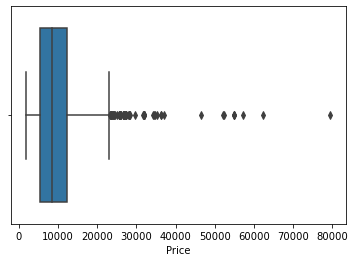

In [40]:
sns.boxplot(df.Price)

In [41]:
from scipy import stats
IQR = stats.iqr(df.Price, interpolation = 'midpoint')
IQR
# First quartile (Q1) 
Q1 = df.Price.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Price.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR
print(min_limit)
print(max_limit)

-5367.0
23017.0


In [42]:
import numpy as np
df.loc[df['Price'] > max_limit]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
123,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,27430,3,1,23,0,19,15,20.0,15
396,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,36983,3,1,12,50,19,15,6.0,25
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,26890,3,1,8,55,15,15,6.0,20
510,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,26890,3,1,7,0,12,25,5.0,25
597,Air India,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,2 stops,No info,25139,3,6,9,40,15,15,29.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,2 stops,No info,24210,3,6,19,50,16,50,21.0,0
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,3,1,9,45,14,25,4.0,40
10383,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,26890,3,1,7,0,5,5,22.0,5
10439,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,31825,3,1,18,40,9,0,14.0,20


#### The price of the flight is depend on the Class( Business and economy), Type of Airline, Total stops and Duration so we dont need to Replace the Outliers

In [45]:
df.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Total_Stops           object
Additional_Info       object
Price                  int64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
dur_hour             float64
dur_min                int32
dtype: object

In [46]:
df['dur_hour'] = df['dur_hour'].astype(int)

In [47]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

##### Finding the cntinuous value 

In [48]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

### Handling categorical data
### We are using two main Encoding Techniques to covert Categorical data into some numerical format
### Nominal data -- Data that are not in any order -->one hot encoding
### ordinal data -- Data are in order --> labelEncoder

In [49]:
categorical = df[column]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [50]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Handling the data

### As Airline, Source, Destination and Total_Stops is Nominal Categorical data we will perform OneHotEncoding

In [51]:

d2 = pd.get_dummies(df['Airline'],prefix = 'Airline',drop_first = True)
df = pd.concat([df,d2], axis = 1).drop(['Airline'],axis = 1)
#encoding of source 
d3 = pd.get_dummies(df['Source'],prefix = 'Source',drop_first = True)
df = pd.concat([df,d3], axis = 1).drop(['Source'],axis = 1)
#encoding of Destination
d4 = pd.get_dummies(df['Destination'],prefix = 'Destination',drop_first = True)
df = pd.concat([df,d4], axis = 1).drop(['Destination'],axis = 1)
#encoding of Total Stops
d5 = pd.get_dummies(df['Total_Stops'],prefix = 'Total_Stops',drop_first = True)
df = pd.concat([df,d5], axis = 1).drop(['Total_Stops'],axis = 1)

In [52]:
drop_col(df,'Additional_Info')

In [53]:
column=[column for column in df.columns if df[column].dtype=='object']
column
categorical = df[column]
categorical.columns

Index(['Route'], dtype='object')

### Working on Route

In [54]:

categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

### Splitting the Categorical value 'Route' into 'Route1','Route2','Route3','Route4','Route5'

In [55]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [56]:
categorical.head()

,Route,Route1,Route2,Route3,Route4,Route5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


### Checking the missing values in categorical columns i.e 'Route1','Route2','Route3','Route4','Route5'

In [57]:
categorical.isnull().sum()

Route         0
Route1        0
Route2        0
Route3     3491
Route4     9116
Route5    10636
dtype: int64

### There are missing values in three categorical columns i.e 'Route3','Route4','Route5'

In [58]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)
categorical.isnull().sum()

Route     0
Route1    0
Route2    0
Route3    0
Route4    0
Route5    0
dtype: int64

### No missing values

### Dropping 'Route'column

In [59]:
drop_col(categorical,'Route') 

In [60]:
categorical.head()

,Route1,Route2,Route3,Route4,Route5
0,BLR,DEL,None,None,None
1,CCU,IXR,BBI,BLR,None
2,DEL,LKO,BOM,COK,None
3,CCU,NAG,BLR,None,None
4,BLR,NAG,DEL,None,None


### Performing LabelEncoding on 'Route'

In [61]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [62]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [63]:
df = pd.concat([df,categorical], axis = 1).drop(['Route'],axis = 1)

In [64]:
df

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Airline_Air India,...,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Route1,Route2,Route3,Route4,Route5
0,3897,24,3,22,20,1,10,2,50,0,...,1,0,0,0,1,0,13,29,13,5
1,7662,5,1,5,50,13,15,7,25,1,...,0,1,0,0,0,2,25,1,3,5
2,13882,6,9,9,25,4,25,19,0,0,...,0,1,0,0,0,3,32,4,5,5
3,6218,5,12,18,5,23,30,5,25,0,...,0,0,0,0,0,2,34,3,13,5
4,13302,3,1,16,50,21,35,4,45,0,...,1,0,0,0,0,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30,0,...,0,0,0,0,1,2,5,29,13,5
10679,4145,27,4,20,45,23,20,2,35,1,...,0,0,0,0,1,2,5,29,13,5
10680,7229,27,4,8,20,11,20,3,0,0,...,0,0,0,0,1,0,13,29,13,5
10681,12648,3,1,11,30,14,10,2,40,0,...,1,0,0,0,1,0,13,29,13,5


In [65]:
df.describe()

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Airline_Air India,...,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Route1,Route2,Route3,Route4,Route5
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.043344,28.326624,0.163921,...,0.087250,0.142295,0.004213,0.000094,0.326811,2.019378,11.897959,13.232166,11.792080,4.983056
std,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.182744,16.945817,0.370221,...,0.282214,0.349369,0.064771,0.009676,0.469070,1.206239,8.006427,11.302632,2.948124,0.263913
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,4.000000,13.000000,5.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,6.000000,13.000000,5.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,14.000000,29.000000,13.000000,5.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,34.000000,55.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,44.000000,29.000000,13.000000,5.000000


# Feature selection

### Heatmap and correlation

<AxesSubplot:>

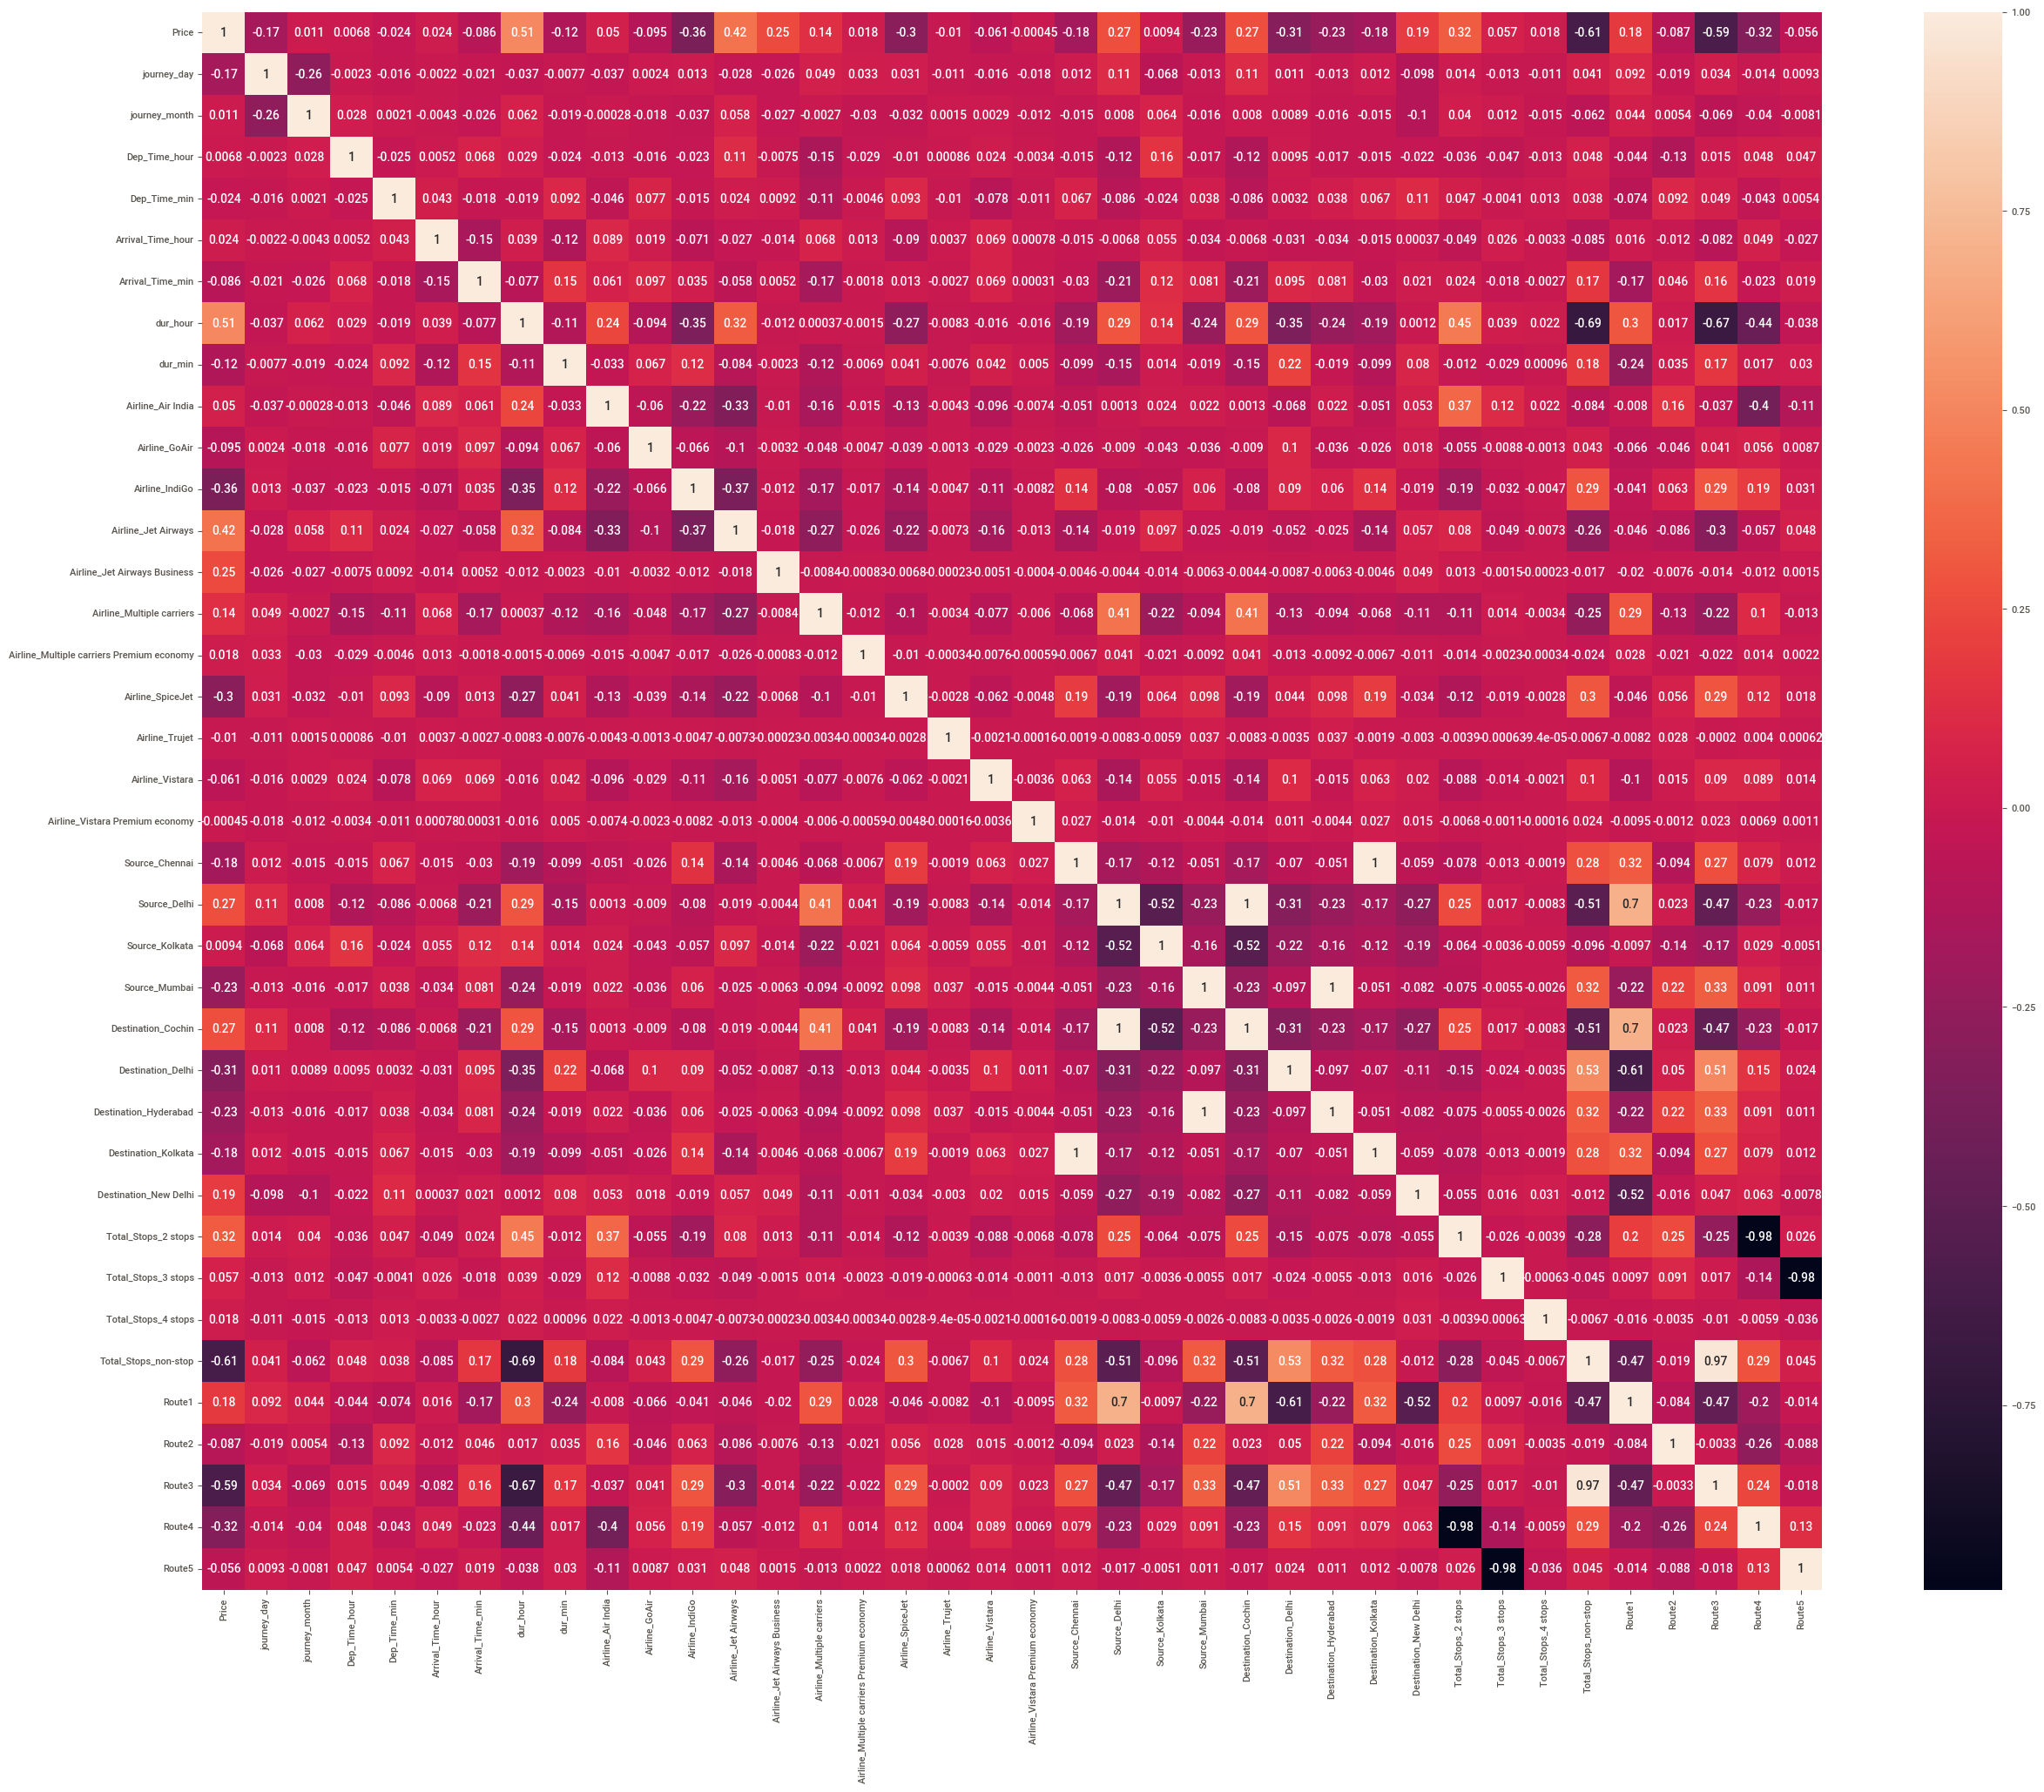

In [66]:
plt.figure(figsize = (30,24))
sns.heatmap(df.corr(), annot = True)

In [67]:
x = df.iloc[:,1:]
y = df.loc[:,['Price']]

### Taking Extra tree Regressor algorithm from ensemble learning to extract features

In [68]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

### Important Features

In [69]:
print(selection.feature_importances_)

[1.11460351e-01 8.34020798e-02 2.07974574e-02 1.86525434e-02
 2.45064230e-02 1.60893812e-02 6.39494714e-02 1.43839556e-02
 7.53237963e-03 1.13470631e-03 1.75345699e-02 7.79184781e-02
 6.42350278e-02 1.99222821e-02 8.89429077e-04 1.86955846e-03
 1.12556705e-04 4.95618398e-03 1.38523422e-04 3.65284582e-04
 1.70697231e-03 2.39372883e-03 3.04493005e-03 1.88202928e-03
 2.72376110e-04 3.48740414e-03 4.68475263e-04 1.51541504e-02
 9.80039197e-03 8.56390587e-04 4.40820297e-05 3.44314609e-01
 1.00471258e-02 2.08195281e-02 1.50655810e-02 2.01431563e-02
 6.48425807e-04]


In [70]:
feature_imp = pd.Series(selection.feature_importances_, index=x.columns).sort_values(0, ascending=False)
feature_imp

Total_Stops_non-stop                         0.344315
journey_day                                  0.111460
journey_month                                0.083402
Airline_Jet Airways                          0.077918
Airline_Jet Airways Business                 0.064235
dur_hour                                     0.063949
Arrival_Time_hour                            0.024506
Route2                                       0.020820
Dep_Time_hour                                0.020797
Route4                                       0.020143
Airline_Multiple carriers                    0.019922
Dep_Time_min                                 0.018653
Airline_IndiGo                               0.017535
Arrival_Time_min                             0.016089
Destination_New Delhi                        0.015154
Route3                                       0.015066
dur_min                                      0.014384
Route1                                       0.010047
Total_Stops_2 stops         

### There are few features which approximately 0 so Taking features of more than 0.01 till dur_min to Build best ML prediction

# Model Building

In [80]:
X = df[['Total_Stops_non-stop','journey_day','journey_month','Airline_Jet Airways','Airline_Jet Airways Business','dur_hour','Arrival_Time_hour','Route2','Dep_Time_hour','Route4','Airline_Multiple carriers','Dep_Time_min','Airline_IndiGo','Arrival_Time_min',                           'Destination_New Delhi',                        
'Route3',                                   
'dur_min']]
X

,Total_Stops_non-stop,journey_day,journey_month,Airline_Jet Airways,Airline_Jet Airways Business,dur_hour,Arrival_Time_hour,Route2,Dep_Time_hour,Route4,Airline_Multiple carriers,Dep_Time_min,Airline_IndiGo,Arrival_Time_min,Destination_New Delhi,Route3,dur_min
0,1,24,3,0,0,2,1,13,22,13,0,20,1,10,1,29,50
1,0,5,1,0,0,7,13,25,5,3,0,50,0,15,0,1,25
2,0,6,9,1,0,19,4,32,9,5,0,25,0,25,0,4,0
3,0,5,12,0,0,5,23,34,18,13,0,5,1,30,0,3,25
4,0,3,1,0,0,4,21,34,16,13,0,50,1,35,1,8,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,4,9,0,0,2,22,5,19,13,0,55,0,25,0,29,30
10679,1,27,4,0,0,2,23,5,20,13,0,45,0,20,0,29,35
10680,1,27,4,1,0,3,11,13,8,13,0,20,0,20,0,29,0
10681,1,3,1,0,0,2,14,13,11,13,0,30,0,10,1,29,40


### Splitting the model

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [83]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     


### 1.  Linear Regression

In [84]:
predict(LinearRegression())

Model is: LinearRegression()
Training score: 0.6176488029233276
Predictions are: [[ 8731.19527602]
 [11342.47789076]
 [11418.03116128]
 ...
 [12829.68413506]
 [15200.15203094]
 [ 4798.49561864]]


r2 score is: 0.5999023777577717
MAE:2011.284592444206
MSE:8385433.956683544
RMSE:2895.761377718051


In [21]:
# Adjusted r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2_score = 1-(1-0.5999)*(2671-1)/(2671-18-1)
adjusted_r2_score

0.5971843891402715

### Training score : 61.7%
### R2 score : 59%

### 2.  Random Forest Regressor

In [85]:
predict(RandomForestRegressor())

Model is: RandomForestRegressor()
Training score: 0.9524613080814697
Predictions are: [ 6699.58       11539.28916667 10990.13       ...  9744.50235714
 16774.23        3220.75      ]


r2 score is: 0.7981667086480939
MAE:1200.5186227638058
MSE:4230116.953473977
RMSE:2056.724812286266


In [20]:
# Adjusted r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2_score = 1-(1-0.7981)*(2671-1)/(2671-18-1)
adjusted_r2_score

0.7967296380090498

### Training score : 95.24%
### R2 score : 79.8%

## Decision Tree Regressor

In [86]:
predict(DecisionTreeRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9693208935981144
Predictions are: [ 6838. 11702. 11622. ... 10953. 16736.  3100.]


r2 score is: 0.6963397114236514
MAE:1346.8015537251965
MSE:6364255.005701672
RMSE:2522.7475112863895


In [19]:
# Adjusted r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2_score = 1-(1-0.6963)*(2671-1)/(2671-18-1)
adjusted_r2_score

0.6942386877828055

### Training score: 96.93%
### R2 score  : 69.6%

## Gradient Boosting Regressor

In [87]:
predict(GradientBoostingRegressor())

Model is: GradientBoostingRegressor()
Training score: 0.8048649085850514
Predictions are: [ 7341.02667267 11957.5454229   9863.16226871 ... 10595.16435699
 15958.32727799  3006.16781691]


r2 score is: 0.7947871357761948
MAE:1482.2682480465746
MSE:4300947.629648184
RMSE:2073.8726165433077


In [18]:
# Adjusted r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2_score = 1-(1-0.7947)*(2671-1)/(2671-18-1)
adjusted_r2_score

0.7933065610859729

### Training score: 80.4%
### R2 score: 79.4%

# XGB Regressor

In [88]:
from xgboost import XGBRegressor
predict(XGBRegressor())

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
Training score: 0.9375078180584827
Predictions are: [ 7205.396  12073.852  10654.36   ... 11634.419  16951.166   2869.8977]


r2 score is: 0.8319560854943178
MAE:1181.3185102376362
MSE:3521943.3172658538
RMSE:1876.6841282607613


In [17]:
# Adjusted r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2_score = 1-(1-0.8319)*(2671-1)/(2671-18-1)
adjusted_r2_score

0.8307590497737556

### Training score: 93.7% and test score is (R2 score): 83.19%
###  The model is underfit 
# To get the best fitting of the model Hyper Parameter Tuning is Required

# Hyper Parameter Tuning
### Using Randomized Search CV
### 1.  Random Forest

In [89]:
# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
## Number of trees in ramdom forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
## Number of features to consider at every split
max_features = ['auto', 'sqrt']
## Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
## Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
## Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [90]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [91]:
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid, scoring='neg_mean_squared_error',
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [92]:
predict(rf_random)

Model is: RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators

In [16]:
# Adjusted r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2_score = 1-(1-0.8311)*(2671-1)/(2671-18-1)
adjusted_r2_score

0.8299536199095022

### Test Score is  83.11%

### 2.  XG BOOST

In [102]:
random_grid = {
    'n_estimators' : [100,300,500,700,900,1100],
    'max_depth':[5,20,35,50],
    }
xgb=XGBRegressor()
xg_random=RandomizedSearchCV(estimator=xgb,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)


In [103]:
predict(xg_random)

Model is: RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...hot=None,
                                          max_delta_step=None, max_depth=None,
        

In [15]:
# Adjusted r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2_score = 1-(1-0.8344)*(2671-1)/(2671-18-1)
adjusted_r2_score

0.8332760180995475

### Training r2 score: 94.3% and  R2 score: 83.44% The model is underfit


# Hyper Parameter Tuning
## Using GridSearch CV
### 1.  Random Forest

In [96]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [97]:
predict(grid_search)

Model is: GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Training score: 0.8633536463062865
Predictions are: [ 7076.09113329 11661.57485332 10423.5938988  ... 10675.62794161
 15813.35864955  3365.85924221]


r2 score is: 0.8013786950405091
MAE:1302.3672540793825
MSE:4162798.633478921
RMSE:2040.2937615644764


In [14]:
# Adjusted r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2_score = 1-(1-0.8013)*(2671-1)/(2671-18-1)
adjusted_r2_score

0.7999513574660634

### Training score: 86.33% and R2 score: 80.13% the model is underfit
### 

In [98]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

### 2.  XGBRegressor

In [99]:
#XGBoost hyper-parameter tuning
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

In [100]:
xgb_model = XGBRegressor()
gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)


In [101]:
predict(gsearch)

Model is: GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                     

In [13]:
# Adjusted r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2_score = 1-(1-0.8518)*(2671-1)/(2671-18-1)
adjusted_r2_score

0.8507941176470588

### Training score: 90.84% and test score: 85.18%  hence the model is underfit

# Even after doing RandomizedSearchCV and GridsearchCV we only got the score of 0.8518, Hence it is nearer to 1, The model is ready for deployement